In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
x=np.array([32.23,
30.47,
29.26,
28.37,
27.34,
26.51,
25.65,
25.1
,24.34,
23.59,
23.19
])
y=np.array([1,
1.1,
1.2,
1.3,
1.4,
1.5,
1.6,
1.7,
1.8,
1.9,
2
])
a=1.36E-3

In [3]:
T2=(x/20)**2
B_inv=1/(y*a)
B_inv

array([735.29411765, 668.44919786, 612.74509804, 565.61085973,
       525.21008403, 490.19607843, 459.55882353, 432.52595156,
       408.49673203, 386.99690402, 367.64705882])

In [4]:
def delta(x):
    return len(x)*np.sum(x**2)-(np.sum(x))**2
def intercepto(x,y):
    c=(np.sum(x**2)*np.sum(y)-np.sum(x)*np.sum(x*y))
    return c/delta(x)
def pendiente(x,y):
    m= len(x)*np.sum(x*y)-np.sum(x)*np.sum(y)
    return m/delta(x)


In [5]:
def alpha_CU(x,y):
    a=np.sum((y-pendiente(x,y)*x-intercepto(x,y))**2)
    return np.sqrt(a/(len(x)-2))
def alpha_C(x,y):
    a=np.sum(x**2)
    a2=a/delta(x)
    return alpha_CU(x,y)*np.sqrt(a2)
def alpha_M(x,y):
    return alpha_CU(x,y)*np.sqrt(len(x)/delta(x))

In [6]:
c=intercepto(B_inv,T2)
c

0.11186396920213265

In [7]:
m=pendiente(B_inv,T2)
m

0.0033439079984703742

In [8]:
def func(x, m, c):
    return m*x+c

In [9]:
a_c=alpha_C(B_inv,T2)
a_c

0.022825208327357394

In [10]:
a_M=alpha_M(B_inv,T2)
a_M

4.3353855545346966e-05

In [11]:
dI=0.1*np.ones(len(x))
dI_inv=dI/(y**2)
dB_inv=dI_inv/a
dT=0.01*np.ones(len(x))
dT2=2*(x/20)*dT/20
dB_inv,B_inv
dT2,T2

(array([0.0016115, 0.0015235, 0.001463 , 0.0014185, 0.001367 , 0.0013255,
        0.0012825, 0.001255 , 0.001217 , 0.0011795, 0.0011595]),
 array([2.59693225, 2.32105225, 2.140369  , 2.01214225, 1.868689  ,
        1.75695025, 1.64480625, 1.575025  , 1.481089  , 1.39122025,
        1.34444025]))

In [12]:
def residuo(x,y,m,c):
    return y-func(x,m,c)

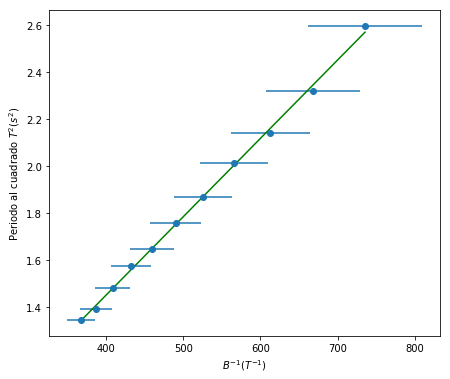

In [13]:
plt.figure(figsize=[7,6])
plt.scatter(B_inv,T2, s=13, c="red")
plt.plot(B_inv, func(B_inv,m,c), c="green")
#plt.errorbar(x,y, yerr=0.01*np.ones(len(x)))
plt.xlabel("$B^{-1}(T^{-1})$")
plt.ylabel("Periodo al cuadrado $T^2(s^2)$")
errorbar(B_inv, T2, xerr=dB_inv, yerr=dT2, fmt="o")
plt.savefig("movimientoArmonicoMagnetico.png")

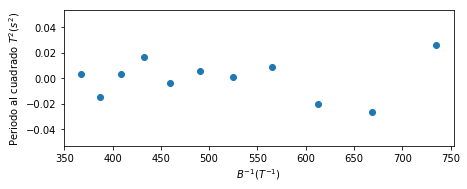

In [14]:
plt.figure(figsize=[7,2.5])
plt.scatter(B_inv, residuo(B_inv,T2,m,c))
plt.xlabel("$B^{-1}(T^{-1})$")
plt.ylabel("Periodo al cuadrado $T^2(s^2)$")
plt.savefig("residuoMAM.png")

In [15]:
a_CU=alpha_CU(B_inv,T2)
a_CU

0.016463841944107736

In [16]:
masa=142.1
diametro=5.33
MI=2*(masa/1000)*(diametro/200)**2/5

In [17]:
mu=4*pi**2*MI/m
mu

0.4765998623577893

In [18]:
dmu=4*pi**2*MI*a_M/(m**2)
dmu

0.006179129807112995

In [19]:
masa=np.array([0
,0.0012
,0.0023
,0.0035
,0.0047
,0.0052
,0.0063
,0.0074
])
z=np.array([0
,0.0007,0.0013,0.0024,0.0035,0.0039,0.0048,0.0053

])

In [20]:
m=pendiente(z,masa)
c=intercepto(z,masa)
a_M=alpha_M(z,masa)
a_c=alpha_C(z,masa)
m,a,a_M,a_c

(1.3037671071814898, 0.00136, 0.045915848861951394, 0.00015100835479412415)

In [21]:
dz=np.sqrt(2)*0.0001*np.ones(len(z))
dmasa=0.0001*np.ones(len(z))
z,dz

(array([0.    , 0.0007, 0.0013, 0.0024, 0.0035, 0.0039, 0.0048, 0.0053]),
 array([0.00014142, 0.00014142, 0.00014142, 0.00014142, 0.00014142,
        0.00014142, 0.00014142, 0.00014142]))

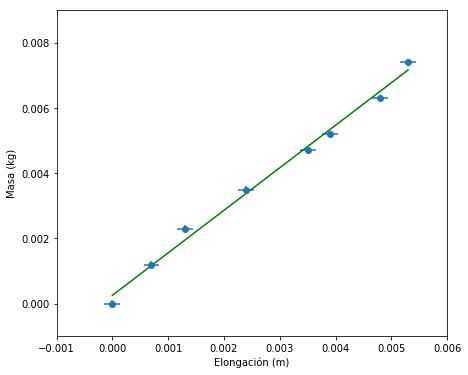

In [24]:
plt.figure(figsize=[7,6])
plt.scatter(z,masa, s=13, c="red")
plt.plot(z, func(z,m,c), c="green")
#plt.errorbar(x,y, yerr=0.01*np.ones(len(x)))
plt.xlabel("Elongación (m)")
plt.ylabel("Masa (kg)")
plt.xlim(-0.001,0.006)
plt.ylim(-0.001,0.009)
errorbar(z, masa, xerr=dz, yerr=dmasa, fmt="o")
plt.savefig("constanteResorte.png")

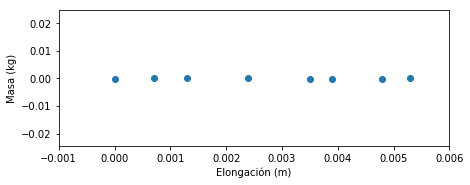

In [25]:
plt.figure(figsize=[7,2.5])
plt.scatter(z, residuo(z,masa,m,c))
plt.xlabel("Elongación (m)")
plt.ylabel("Masa (kg)")
plt.xlim(-0.001,0.006)
plt.savefig("residuoResorte.png")

In [26]:
g=9.77412

In [27]:
k=g*m
dk=g*a_M
k,dk

(12.743176157644744, 0.44878701667857634)

In [29]:
I_t=np.array([0
,0.5,
1,
1.5,
2,
2.5,
3,
3.5,
4
])
z=np.array([0
,0.0004
,0.0008
,0.0011
,0.0014
,0.0016
,0.0019
,0.0023
,0.0025
])
b=1.69E-2

In [30]:
grad=I_t*b

In [31]:
m=pendiente(grad,z)
c=intercepto(grad,z)
a_M=alpha_M(grad,z)
a_c=alpha_C(grad,z)
m,a,a_M,a_c

(0.03629191321499012, 0.00136, 0.00111575034506753, 4.488668861494255e-05)

In [41]:
dI=0.01*np.ones(len(I_t))
dgrad=dI*b
grad,dgrad
dz=np.sqrt(2)*0.0001*np.ones(len(z))

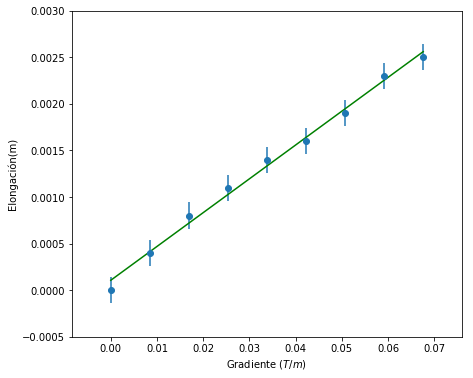

In [51]:
plt.figure(figsize=[7,6])
plt.scatter(grad,z, s=13, c="red")
plt.plot(grad, func(grad,m,c), c="green")
#plt.errorbar(x,y, yerr=0.01*np.ones(len(x)))
plt.xlabel("Gradiente ($T/m$)")
plt.ylabel("Elongación(m)")
#plt.xlim(-0.001,0.006)
plt.ylim(-0.0005,0.003)
errorbar(grad, z, xerr=dgrad, yerr=dz, fmt="o")
plt.savefig("gradienteMagnetico.png")

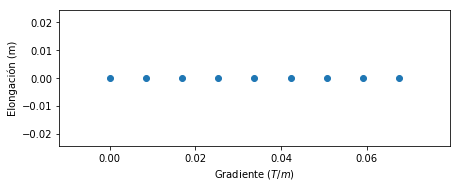

In [46]:
plt.figure(figsize=[7,2.5])
plt.scatter(grad, residuo(grad,z,m,c))
plt.ylabel("Elongación (m)")
plt.xlabel("Gradiente ($T/m$)")
#plt.xlim(-0.001,0.006)
plt.savefig("residuoGradiente.png")

In [48]:
mu=k*m
mu

0.46247424319657426

In [50]:
dmu=mu*np.sqrt((dk/k)**2+(a_M/m)**2)
dmu

0.021620238870710472